# Supplementary figure: Check correlations between regressors
Natalia Vélez, August 2022

In [25]:
%matplotlib inline

import os, sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from os.path import join as opj
from scipy import stats

sys.path.append('..')
from utils import gsearch, print_list, str_extract, int_extract

sns.set_context('talk')
sns.set_style('white')

Load model files:

In [7]:
data_dir = '../../BIDS_data/derivatives/'
glm_dir = opj(data_dir, 'model_events')

param_files = gsearch(glm_dir, '**', 'func', '*model-main_events.tsv')
param_files.sort()
print_list(param_files)

Found 280 items
../../BIDS_data/derivatives/model_events/sub-01/func/sub-01_task-teaching_run-01_model-main_events.tsv
../../BIDS_data/derivatives/model_events/sub-01/func/sub-01_task-teaching_run-02_model-main_events.tsv
../../BIDS_data/derivatives/model_events/sub-01/func/sub-01_task-teaching_run-03_model-main_events.tsv
../../BIDS_data/derivatives/model_events/sub-01/func/sub-01_task-teaching_run-04_model-main_events.tsv
../../BIDS_data/derivatives/model_events/sub-01/func/sub-01_task-teaching_run-05_model-main_events.tsv
../../BIDS_data/derivatives/model_events/sub-01/func/sub-01_task-teaching_run-06_model-main_events.tsv
../../BIDS_data/derivatives/model_events/sub-01/func/sub-01_task-teaching_run-07_model-main_events.tsv
../../BIDS_data/derivatives/model_events/sub-01/func/sub-01_task-teaching_run-08_model-main_events.tsv
../../BIDS_data/derivatives/model_events/sub-01/func/sub-01_task-teaching_run-09_model-main_events.tsv
../../BIDS_data/derivatives/model_events/sub-01/func/sub-

Load empirical regressor files:

In [8]:
student_files = gsearch(glm_dir, '**', 'func', '*model-empirical_events.tsv')
student_files.sort()
print_list(student_files)

Found 280 items
../../BIDS_data/derivatives/model_events/sub-01/func/sub-01_task-teaching_run-01_model-empirical_events.tsv
../../BIDS_data/derivatives/model_events/sub-01/func/sub-01_task-teaching_run-02_model-empirical_events.tsv
../../BIDS_data/derivatives/model_events/sub-01/func/sub-01_task-teaching_run-03_model-empirical_events.tsv
../../BIDS_data/derivatives/model_events/sub-01/func/sub-01_task-teaching_run-04_model-empirical_events.tsv
../../BIDS_data/derivatives/model_events/sub-01/func/sub-01_task-teaching_run-05_model-empirical_events.tsv
../../BIDS_data/derivatives/model_events/sub-01/func/sub-01_task-teaching_run-06_model-empirical_events.tsv
../../BIDS_data/derivatives/model_events/sub-01/func/sub-01_task-teaching_run-07_model-empirical_events.tsv
../../BIDS_data/derivatives/model_events/sub-01/func/sub-01_task-teaching_run-08_model-empirical_events.tsv
../../BIDS_data/derivatives/model_events/sub-01/func/sub-01_task-teaching_run-09_model-empirical_events.tsv
../../BIDS_d

## (a) Correlations between model-derived regressors

Load model-based regressors:

In [21]:
param_list = []

for f in param_files:
    # extract sub/run information
    sub = str_extract('sub-[0-9]{2}', f)
    run = int_extract('(?<=run-)[0-9]{2}', f)

    # clean up run data
    run_events = pd.read_csv(f, sep='\t')
    run_events = (
        run_events
        [run_events.trial_type.isin(['pTrue', 'KL'])]
        .pivot(index='onset', columns='trial_type', values='value')
        .reset_index()
        .assign(subject=sub, run=run)
    )

    param_list.append(run_events)
    
param_df = pd.concat(param_list)
print(param_df.shape)
param_df.head()

(3213, 5)


trial_type,onset,KL,pTrue,subject,run
0,37.15,0.516503,-0.126543,sub-01,1
1,52.85,1.209600,0.040123,sub-01,1
2,111.30,2.341827,0.040123,sub-01,1
3,125.75,-1.223922,0.040123,sub-01,1
4,140.45,-1.223922,0.040123,sub-01,1


Correlation stats

In [33]:
param_r, param_p = stats.pearsonr(param_df.pTrue, param_df.KL)
print((param_r, param_p))

(0.4878566529125599, 8.606060148884525e-192)


Plot correlation:

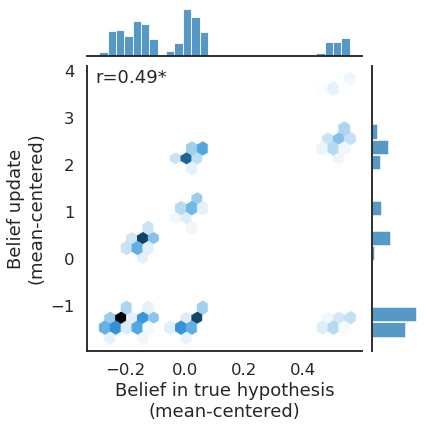

In [58]:
g = sns.jointplot(data=param_df, x='pTrue', y='KL', kind='hex')
g.ax_joint.set(xlabel='Belief in true hypothesis\n(mean-centered)', 
               ylabel='Belief update\n(mean-centered)')
g.ax_joint.text(-0.3, 3.75, f'r={param_r:0.2}*')

plt.savefig('plots/model_regressor_correlations.png', bbox_inches='tight')

## (b) Correlations between empirical regressors

Load student regressors:

In [44]:
student_list = []

for f in student_files:
    # extract sub/run information
    sub = str_extract('sub-[0-9]{2}', f)
    run = int_extract('(?<=run-)[0-9]{2}', f)

    # clean up run data
    run_events = pd.read_csv(f, sep='\t')
    run_events = (
        run_events
        [run_events.trial_type.isin(['pTrue', 'KL'])]
        .pivot(index='onset', columns='trial_type', values='value')
        .reset_index()
        .assign(subject=sub, run=run)
    )

    student_list.append(run_events)
    
student_df = pd.concat(student_list)
print(student_df.shape)
student_df.head()

(3205, 5)


trial_type,onset,KL,pTrue,subject,run
0,37.15,0.754749,-0.211405,sub-01,1
1,52.85,0.248322,-0.069094,sub-01,1
2,111.30,1.273673,-0.122948,sub-01,1
3,125.75,-2.006561,-0.158416,sub-01,1
4,140.45,1.693224,-0.099848,sub-01,1


Correlation test:

In [46]:
student_r, student_p = stats.pearsonr(student_df.pTrue, student_df.KL)
print((student_r, student_p))

(-0.010157547420684861, 0.5654016130831221)


Plot correlation: 

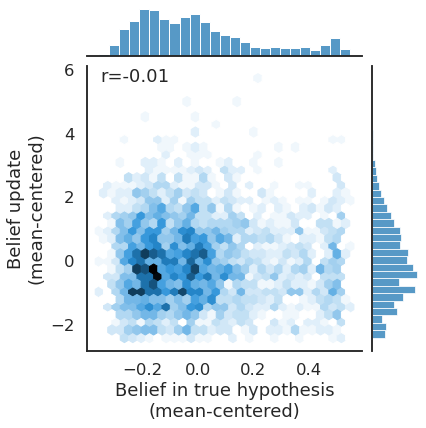

In [57]:
g = sns.jointplot(data=student_df, x='pTrue', y='KL', kind='hex')
g.ax_joint.set(xlabel='Belief in true hypothesis\n(mean-centered)', 
               ylabel='Belief update\n(mean-centered)')
g.ax_joint.text(-0.35, 5.6, f'r={student_r:0.2}')

plt.savefig('plots/empirical_regressor_correlations.png', bbox_inches='tight')